In [1]:
import pandas as pd

In [17]:
df = pd.read_csv("BTC_feature_data.csv", index_col="Unnamed: 0", parse_dates=True)

In [6]:
df.head()

,phigh_day_touch,plow_day_touch,phigh_night_touch,plow_night_touch,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
2017-08-17,0,0,0,0,-0.003549,0.036527,-0.003967,0.053105
2017-08-18,0,1,0,1,-0.011031,0.079103,0.015688,0.103984
2017-08-19,0,0,0,0,-0.039757,0.002082,-0.053687,-0.011809
2017-08-20,1,0,0,0,-0.013015,0.016905,0.004034,0.056156
2017-08-21,0,1,0,1,-0.012406,0.060697,0.007486,0.182350


In [10]:
df.isnull().sum()

phigh_day_touch                  0
plow_day_touch                   0
phigh_night_touch                0
plow_night_touch                 0
ret_distance_phigh_day_open      0
ret_distance_plow_day_open       0
ret_distance_phigh_night_open    0
ret_distance_plow_night_open     0
dtype: int64

Since we treat every row as an independent event we reset the index

In [18]:
df.reset_index(inplace=True, drop=True)

In [20]:
df.head(2)

,phigh_day_touch,plow_day_touch,phigh_night_touch,plow_night_touch,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
0,0,0,0,0,-0.003549,0.036527,-0.003967,0.053105
1,0,1,0,1,-0.011031,0.079103,0.015688,0.103984


In [11]:
for col in df.columns:
	print(col)
	print(df[col].unique()[:5])
	print(df[col].nunique())
	print()

phigh_day_touch
[0 1]
2

plow_day_touch
[0 1]
2

phigh_night_touch
[0 1]
2

plow_night_touch
[0 1]
2

ret_distance_phigh_day_open
[-0.00354945 -0.01103135 -0.03975672 -0.013015   -0.01240637]
1875

ret_distance_plow_day_open
[0.0365269  0.07910337 0.00208212 0.01690468 0.06069737]
1871

ret_distance_phigh_night_open
[-0.00396658  0.01568814 -0.05368694  0.00403416  0.00748599]
1875

ret_distance_plow_night_open
[ 0.05310537  0.10398442 -0.0118087   0.05615588  0.18235   ]
1875



In [58]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [64]:
categorical = ["phigh_day_touch", "plow_day_touch","phigh_night_touch", "plow_night_touch"]

numerical = ["ret_distance_phigh_day_open", "ret_distance_plow_day_open", 
            "ret_distance_phigh_night_open", "ret_distance_plow_night_open"]

In [23]:
for c in categorical:
    print(df_train[c].value_counts(normalize=True))

0    0.686222
1    0.313778
Name: phigh_day_touch, dtype: float64
0    0.72
1    0.28
Name: plow_day_touch, dtype: float64
0    0.623111
1    0.376889
Name: phigh_night_touch, dtype: float64
0    0.702222
1    0.297778
Name: plow_night_touch, dtype: float64


In [65]:
df_train[numerical].describe()

,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
count,1125.000000,1125.000000,1125.000000,1125.000000
mean,-0.016181,0.018038,-0.022435,0.026159
std,0.017292,0.023812,0.030991,0.042440
min,-0.142178,0.000000,-0.190536,-0.088098
25%,-0.020692,0.005151,-0.036714,0.004089
50%,-0.011082,0.010537,-0.016510,0.015313
75%,-0.005486,0.021630,-0.004590,0.037010
max,-0.000024,0.285116,0.088499,0.399360


<AxesSubplot:xlabel='ret_distance_phigh_day_open', ylabel='Count'>

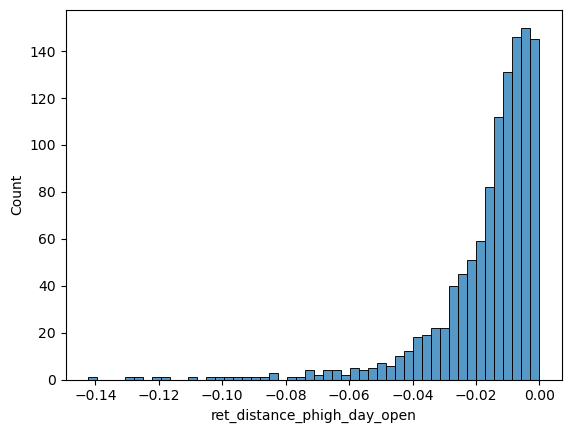

In [57]:
import seaborn as sns
import numpy as np

sns.histplot(df_train.ret_distance_phigh_day_open, bins=50)

<AxesSubplot:xlabel='ret_distance_plow_day_open', ylabel='Count'>

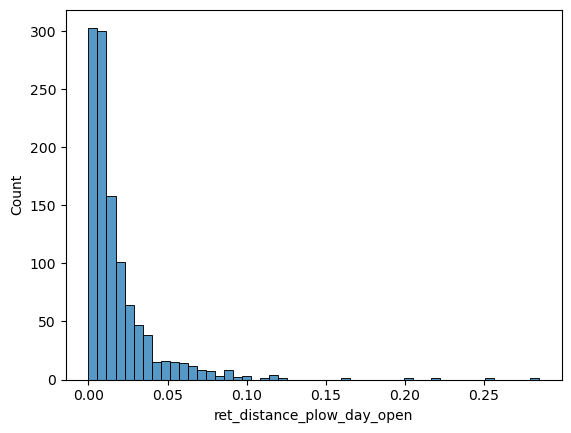

In [36]:
sns.histplot(df_train.ret_distance_plow_day_open, bins=50)

<AxesSubplot:xlabel='ret_distance_phigh_night_open', ylabel='Count'>

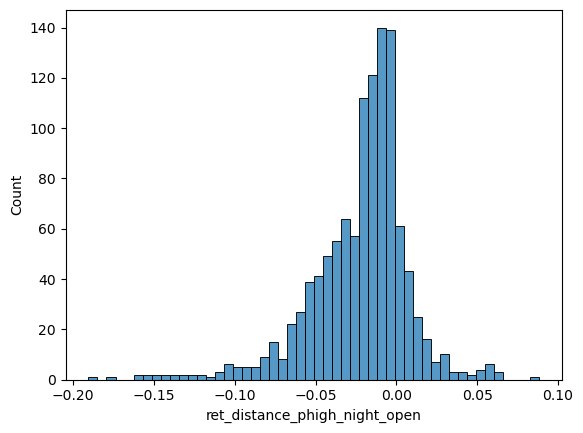

In [37]:
sns.histplot(df_train.ret_distance_phigh_night_open, bins=50)

<AxesSubplot:xlabel='ret_distance_plow_night_open', ylabel='Count'>

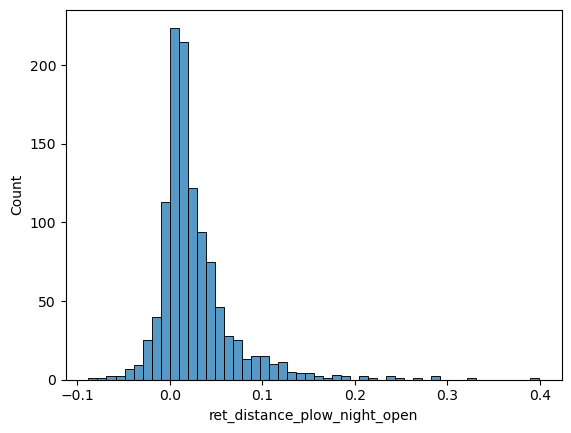

In [38]:
sns.histplot(df_train.ret_distance_plow_night_open, bins=50)

In [73]:
import pickle
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [74]:
# Training

def train(df_train, y_train, C=1.0):
    dicts = df_train[numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [96]:
# validation
def cv_train(df_train, df_val, y_feature):
    scores = []
    for C in [0.01, 0.1, 1, 10]:
        print(f"Doing validation with C={C}")

        kfold = KFold(n_splits=5, shuffle=True, random_state=1)
        fold = 0
        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train[f"{y_feature}"].values
            y_val = df_val[f"{y_feature}"].values

            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)

            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)

            print(f'auc on fold {fold} is {auc}')
            fold += 1
            
    return scores



In [94]:
def val_results(scores, y_feature, C):

    print("Validation results:")
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

    dv, model = train(df_full_train, df_full_train[y_feature].values, C=C)
    y_pred = predict(df_test, dv, model)

    y_test = df_test[y_feature].values
    auc = roc_auc_score(y_test, y_pred)

    print(f'auc={auc}')

In [98]:
scores_m1 = cv_train(df_train, df_val, y_feature=categorical[0])

Doing validation with C=0.01
auc on fold 0 is 0.5966444270015699
auc on fold 1 is 0.5953689167974883
auc on fold 2 is 0.559138692803819
auc on fold 3 is 0.5779860482453805
auc on fold 4 is 0.5737792214707919
Doing validation with C=0.1
auc on fold 0 is 0.5864894034536892
auc on fold 1 is 0.5987048665620094
auc on fold 2 is 0.5378599360113757
auc on fold 3 is 0.5425741519782736
auc on fold 4 is 0.5840566590340275
Doing validation with C=1
auc on fold 0 is 0.5895310047095761
auc on fold 1 is 0.6019917582417582
auc on fold 2 is 0.54126250571327
auc on fold 3 is 0.5437456733585387
auc on fold 4 is 0.5868257095691997
Doing validation with C=10
auc on fold 0 is 0.6054748822605965
auc on fold 1 is 0.6179846938775511
auc on fold 2 is 0.5805190188410949
auc on fold 3 is 0.5644070504286703
auc on fold 4 is 0.6057830555407636


In [99]:
scores_m2 = cv_train(df_train, df_val, y_feature=categorical[1])

Doing validation with C=0.01
auc on fold 0 is 0.5685938392810763
auc on fold 1 is 0.6225941002060404
auc on fold 2 is 0.5705824820691154
auc on fold 3 is 0.5293987007939591
auc on fold 4 is 0.5989191729323308
Doing validation with C=0.1
auc on fold 0 is 0.5685418939275881
auc on fold 1 is 0.6288255691240766
auc on fold 2 is 0.5649315366224733
auc on fold 3 is 0.5402254178002331
auc on fold 4 is 0.5885220864661653
Doing validation with C=1
auc on fold 0 is 0.5798140356345125
auc on fold 1 is 0.6336499321573948
auc on fold 2 is 0.5745490110845469
auc on fold 3 is 0.5501637887957359
auc on fold 4 is 0.5994478383458646
Doing validation with C=10
auc on fold 0 is 0.6212144823645525
auc on fold 1 is 0.6305341976983768
auc on fold 2 is 0.6245924798956749
auc on fold 3 is 0.5993559491421909
auc on fold 4 is 0.648672462406015


In [100]:
scores_m3 = cv_train(df_train, df_val, y_feature=categorical[2])

Doing validation with C=0.01
auc on fold 0 is 0.7627797067901235
auc on fold 1 is 0.715496368038741
auc on fold 2 is 0.6678381458966565
auc on fold 3 is 0.7635701102645401
auc on fold 4 is 0.7083272283272283
Doing validation with C=0.1
auc on fold 0 is 0.7686631944444444
auc on fold 1 is 0.7131681877444589
auc on fold 2 is 0.665036094224924
auc on fold 3 is 0.768917703847428
auc on fold 4 is 0.708962148962149
Doing validation with C=1
auc on fold 0 is 0.7767168209876544
auc on fold 1 is 0.718848947662507
auc on fold 2 is 0.6708776595744681
auc on fold 3 is 0.774691211963466
auc on fold 4 is 0.714969474969475
Doing validation with C=10
auc on fold 0 is 0.8082079475308642
auc on fold 1 is 0.7520953622648539
auc on fold 2 is 0.7104863221884498
auc on fold 3 is 0.7957503194358998
auc on fold 4 is 0.7440293040293041


In [101]:
scores_m4 = cv_train(df_train, df_val, y_feature=categorical[3])

Doing validation with C=0.01
auc on fold 0 is 0.7498978758169934
auc on fold 1 is 0.7328248130935543
auc on fold 2 is 0.7734920634920636
auc on fold 3 is 0.7921693121693122
auc on fold 4 is 0.7365741776683822
Doing validation with C=0.1
auc on fold 0 is 0.7495404411764706
auc on fold 1 is 0.7438371388159224
auc on fold 2 is 0.783015873015873
auc on fold 3 is 0.7902645502645502
auc on fold 4 is 0.7406578652942493
Doing validation with C=1
auc on fold 0 is 0.7581699346405228
auc on fold 1 is 0.754192766215397
auc on fold 2 is 0.7935449735449736
auc on fold 3 is 0.797883597883598
auc on fold 4 is 0.7492727679570373
Doing validation with C=10
auc on fold 0 is 0.8034109477124182
auc on fold 1 is 0.7993028894726206
auc on fold 2 is 0.8368253968253969
auc on fold 3 is 0.8316931216931216
auc on fold 4 is 0.7906690534795257


All models perform better with C = 10

In [106]:
print(categorical[0])
val_results(scores_m1, categorical[0], 10)
print(categorical[1])
val_results(scores_m2, categorical[1], 10)
print(categorical[2])
val_results(scores_m3, categorical[2], 10)
print(categorical[3])
val_results(scores_m4, categorical[3], 10)

phigh_day_touch
Validation results:
C=10 0.580 +- 0.023
auc=0.5715870135107884
plow_day_touch
Validation results:
C=10 0.592 +- 0.033
auc=0.6297645211930927
phigh_night_touch
Validation results:
C=10 0.735 +- 0.041
auc=0.7347416413373861
plow_night_touch
Validation results:
C=10 0.775 +- 0.030
auc=0.8262493210211841


In [108]:
for i in categorical:
    dv, model = train(df_full_train, df_full_train[i].values, C=10)
    output_file = f'model_{i}_C=10.bin'

    with open(output_file, 'wb') as f_out:
        pickle.dump((dv, model), f_out)